In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns ## For histogram and other plots
import sys
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import statsmodels.api as sm

In [2]:
#import data
path = r"C:\Users\20151\OneDrive - EDHEC\EDHEC\Thesis\Python Codes\Data"
data = pd.read_csv(path + r"\UCI_Credit_Card.csv") 
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
#change column names
new_names = {'default.payment.next.month': 'DEF_PAY_10', 
                  'PAY_0': 'PAY_09',
                   'PAY_2':'PAY_08',
                   'PAY_3':'PAY_07',
                   'PAY_4':'PAY_06',
                   'PAY_5':'PAY_05',
                   'PAY_6':'PAY_04',
                   'BILL_AMT1':'BILL_AMT_09',
                   'BILL_AMT2':'BILL_AMT_08',
                   'BILL_AMT3':'BILL_AMT_07',
                   'BILL_AMT4':'BILL_AMT_06',
                   'BILL_AMT5':'BILL_AMT_05',
                   'BILL_AMT6':'BILL_AMT_04',
                   'PAY_AMT1':'PAY_AMT_09',
                   'PAY_AMT2':'PAY_AMT_08',
                   'PAY_AMT3':'PAY_AMT_07',
                   'PAY_AMT4':'PAY_AMT_06',
                   'PAY_AMT5':'PAY_AMT_05',
                   'PAY_AMT6':'PAY_AMT_04'
                   }


data = data.rename(columns= new_names)

data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_09,PAY_08,PAY_07,PAY_06,...,BILL_AMT_06,BILL_AMT_05,BILL_AMT_04,PAY_AMT_09,PAY_AMT_08,PAY_AMT_07,PAY_AMT_06,PAY_AMT_05,PAY_AMT_04,DEF_PAY_10
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_09,PAY_08,PAY_07,PAY_06,...,BILL_AMT_06,BILL_AMT_05,BILL_AMT_04,PAY_AMT_09,PAY_AMT_08,PAY_AMT_07,PAY_AMT_06,PAY_AMT_05,PAY_AMT_04,DEF_PAY_10
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           30000 non-null  int64  
 1   LIMIT_BAL    30000 non-null  float64
 2   SEX          30000 non-null  int64  
 3   EDUCATION    30000 non-null  int64  
 4   MARRIAGE     30000 non-null  int64  
 5   AGE          30000 non-null  int64  
 6   PAY_09       30000 non-null  int64  
 7   PAY_08       30000 non-null  int64  
 8   PAY_07       30000 non-null  int64  
 9   PAY_06       30000 non-null  int64  
 10  PAY_05       30000 non-null  int64  
 11  PAY_04       30000 non-null  int64  
 12  BILL_AMT_09  30000 non-null  float64
 13  BILL_AMT_08  30000 non-null  float64
 14  BILL_AMT_07  30000 non-null  float64
 15  BILL_AMT_06  30000 non-null  float64
 16  BILL_AMT_05  30000 non-null  float64
 17  BILL_AMT_04  30000 non-null  float64
 18  PAY_AMT_09   30000 non-null  float64
 19  PAY_

In [6]:
#categorical variables
data[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [7]:
#numerical variables
data[['LIMIT_BAL','PAY_04','PAY_05','PAY_06','PAY_07','PAY_08','PAY_09',
      'BILL_AMT_04','BILL_AMT_05','BILL_AMT_06','BILL_AMT_07','BILL_AMT_08','BILL_AMT_09',
      'PAY_AMT_04','PAY_AMT_05']].describe()

,LIMIT_BAL,PAY_04,PAY_05,PAY_06,PAY_07,PAY_08,PAY_09,BILL_AMT_04,BILL_AMT_05,BILL_AMT_06,BILL_AMT_07,BILL_AMT_08,BILL_AMT_09,PAY_AMT_04,PAY_AMT_05
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,-0.291100,-0.266200,-0.220667,-0.166200,-0.133767,-0.016700,38871.760400,40311.400967,43262.948967,4.701315e+04,49179.075167,51223.330900,5215.502567,4799.387633
std,129747.661567,1.149988,1.133187,1.169139,1.196868,1.197186,1.123802,59554.107537,60797.155770,64332.856134,6.934939e+04,71173.768783,73635.860576,17777.465775,15278.305679
min,10000.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-339603.000000,-81334.000000,-170000.000000,-1.572640e+05,-69777.000000,-165580.000000,0.000000,0.000000
25%,50000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1256.000000,1763.000000,2326.750000,2.666250e+03,2984.750000,3558.750000,117.750000,252.500000
50%,140000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17071.000000,18104.500000,19052.000000,2.008850e+04,21200.000000,22381.500000,1500.000000,1500.000000
75%,240000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49198.250000,50190.500000,54506.000000,6.016475e+04,64006.250000,67091.000000,4000.000000,4031.500000
max,1000000.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,961664.000000,927171.000000,891586.000000,1.664089e+06,983931.000000,964511.000000,528666.000000,426529.000000


In [8]:
#numerical variables
data[[
      'BILL_AMT_04','BILL_AMT_05','BILL_AMT_06','BILL_AMT_07','BILL_AMT_08','BILL_AMT_09',
      'PAY_AMT_04','PAY_AMT_05']].describe()

,BILL_AMT_04,BILL_AMT_05,BILL_AMT_06,BILL_AMT_07,BILL_AMT_08,BILL_AMT_09,PAY_AMT_04,PAY_AMT_05
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,38871.760400,40311.400967,43262.948967,4.701315e+04,49179.075167,51223.330900,5215.502567,4799.387633
std,59554.107537,60797.155770,64332.856134,6.934939e+04,71173.768783,73635.860576,17777.465775,15278.305679
min,-339603.000000,-81334.000000,-170000.000000,-1.572640e+05,-69777.000000,-165580.000000,0.000000,0.000000
25%,1256.000000,1763.000000,2326.750000,2.666250e+03,2984.750000,3558.750000,117.750000,252.500000
50%,17071.000000,18104.500000,19052.000000,2.008850e+04,21200.000000,22381.500000,1500.000000,1500.000000
75%,49198.250000,50190.500000,54506.000000,6.016475e+04,64006.250000,67091.000000,4000.000000,4031.500000
max,961664.000000,927171.000000,891586.000000,1.664089e+06,983931.000000,964511.000000,528666.000000,426529.000000


In [9]:
data[['PAY_AMT_04','PAY_AMT_05','PAY_AMT_06','PAY_AMT_07','PAY_AMT_08','PAY_AMT_09']].describe()

,PAY_AMT_04,PAY_AMT_05,PAY_AMT_06,PAY_AMT_07,PAY_AMT_08,PAY_AMT_09
count,30000.000000,30000.000000,30000.000000,30000.00000,3.000000e+04,30000.000000
mean,5215.502567,4799.387633,4826.076867,5225.68150,5.921163e+03,5663.580500
std,17777.465775,15278.305679,15666.159744,17606.96147,2.304087e+04,16563.280354
min,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000
25%,117.750000,252.500000,296.000000,390.00000,8.330000e+02,1000.000000
50%,1500.000000,1500.000000,1500.000000,1800.00000,2.009000e+03,2100.000000
75%,4000.000000,4031.500000,4013.250000,4505.00000,5.000000e+03,5006.000000
max,528666.000000,426529.000000,621000.000000,896040.00000,1.684259e+06,873552.000000


In [10]:
#1:male and 2:female
freq_column1 = data['SEX'].value_counts()
category_percentage = data['SEX'].value_counts(normalize=True)*100
mean_sex = data.groupby('SEX')['DEF_PAY_10'].mean()
print(freq_column1)
print(category_percentage)
print(mean_sex)

2    18112
1    11888
Name: SEX, dtype: int64
2    60.373333
1    39.626667
Name: SEX, dtype: float64
SEX
1    0.241672
2    0.207763
Name: DEF_PAY_10, dtype: float64


In [11]:
#table of requencies for SEX
result_table = data.groupby('SEX').agg({
    'DEF_PAY_10': ['count', lambda x: (x == 1).sum(), lambda x: (x == 0).sum(), 'mean']
})
result_table.columns = ['n', 'defaulters', 'no defaulters', 'mean']

print(result_table)

         n  defaulters  no defaulters      mean
SEX                                            
1    11888        2873           9015  0.241672
2    18112        3763          14349  0.207763


In [12]:
#2:university , 1:graduate school , 3:high school, 4,5,6,0:unknownn
freq_column1 = data['EDUCATION'].value_counts()
category_percentage = data['EDUCATION'].value_counts(normalize=True)*100

print(freq_column1)
print(category_percentage)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: EDUCATION, dtype: float64


In [13]:
#table of requencies for EDUCATION
result_table = data.groupby('EDUCATION').agg({
    'DEF_PAY_10': ['count', lambda x: (x == 1).sum(), lambda x: (x == 0).sum(), 'mean']
})
result_table.columns = ['n', 'defaulters', 'no defaulters', 'mean']

print(result_table)

               n  defaulters  no defaulters      mean
EDUCATION                                            
0             14           0             14  0.000000
1          10585        2036           8549  0.192348
2          14030        3330          10700  0.237349
3           4917        1237           3680  0.251576
4            123           7            116  0.056911
5            280          18            262  0.064286
6             51           8             43  0.156863


In [14]:
#2:single , 1:married, 3,0: others
freq_column1 = data['MARRIAGE'].value_counts()
category_percentage = data['MARRIAGE'].value_counts(normalize=True)*100

print(freq_column1)
print(category_percentage)

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: MARRIAGE, dtype: float64


In [15]:
age_bins = [21, 25, 41, 57, 76]
age_labels = ['21-24', '25-40', '41-56', '57-79']

# Create 'Age Range' column using pd.cut
data['Age Range'] = pd.cut(data['AGE'], bins=age_bins, labels=age_labels, right=False)

# Group by 'Age Range' and count occurrences
result_table = data.groupby('Age Range').agg({
    'AGE': 'count',
    'DEF_PAY_10': 'mean'
}).reset_index()

print(result_table)

  Age Range    AGE  DEF_PAY_10
0     21-24   2685    0.271881
1     25-40  19041    0.206397
2     41-56   7608    0.236725
3     57-79    665    0.263158


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ID           30000 non-null  int64   
 1   LIMIT_BAL    30000 non-null  float64 
 2   SEX          30000 non-null  int64   
 3   EDUCATION    30000 non-null  int64   
 4   MARRIAGE     30000 non-null  int64   
 5   AGE          30000 non-null  int64   
 6   PAY_09       30000 non-null  int64   
 7   PAY_08       30000 non-null  int64   
 8   PAY_07       30000 non-null  int64   
 9   PAY_06       30000 non-null  int64   
 10  PAY_05       30000 non-null  int64   
 11  PAY_04       30000 non-null  int64   
 12  BILL_AMT_09  30000 non-null  float64 
 13  BILL_AMT_08  30000 non-null  float64 
 14  BILL_AMT_07  30000 non-null  float64 
 15  BILL_AMT_06  30000 non-null  float64 
 16  BILL_AMT_05  30000 non-null  float64 
 17  BILL_AMT_04  30000 non-null  float64 
 18  PAY_AMT_09   30000 non-nul

In [17]:
data[['PAY_04', 'PAY_05', 'PAY_06', 'PAY_07', 'PAY_08', 'PAY_09']].describe()

,PAY_04,PAY_05,PAY_06,PAY_07,PAY_08,PAY_09
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.291100,-0.266200,-0.220667,-0.166200,-0.133767,-0.016700
std,1.149988,1.133187,1.169139,1.196868,1.197186,1.123802
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [18]:
data[['DEF_PAY_10']].describe()

,DEF_PAY_10
count,30000.000000
mean,0.221200
std,0.415062
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [19]:
data = data.rename(columns={'default.payment.next.month': 'def_pay'})
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_09,PAY_08,PAY_07,PAY_06,...,BILL_AMT_05,BILL_AMT_04,PAY_AMT_09,PAY_AMT_08,PAY_AMT_07,PAY_AMT_06,PAY_AMT_05,PAY_AMT_04,DEF_PAY_10,Age Range
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,21-24
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,25-40
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,25-40
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,25-40
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,57-79


In [20]:
#CHANGIN SEX COLUMN
sex_dummies = pd.get_dummies(data['SEX'])
sex_dummies = sex_dummies.rename(columns={1:'Male',2:'Female'})
sex_dummies = sex_dummies.astype(float)

In [21]:
#ADD TO THE DATAFRAME
data = pd.concat([data, sex_dummies], axis=1)

In [22]:
data[['SEX','Male','Female']]
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_09,PAY_08,PAY_07,PAY_06,...,PAY_AMT_09,PAY_AMT_08,PAY_AMT_07,PAY_AMT_06,PAY_AMT_05,PAY_AMT_04,DEF_PAY_10,Age Range,Male,Female
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,689.0,0.0,0.0,0.0,0.0,1,21-24,0.0,1.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,25-40,0.0,1.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,25-40,0.0,1.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,25-40,0.0,1.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,57-79,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,25-40,1.0,0.0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,41-56,1.0,0.0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,25-40,1.0,0.0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,41-56,1.0,0.0


In [23]:
#agrupar the 0's and 3's into one category
grouped_counts = data.groupby('MARRIAGE').size().reset_index(name='Count')
grouped_counts

,MARRIAGE,Count
0,0,54
1,1,13659
2,2,15964
3,3,323


In [72]:
#CHANGING MARRIAGE COLUMN
data['MARRIAGE_2'] = np.where((data['MARRIAGE']==0) | (data['MARRIAGE']==3) , 'Others', np.where(data['MARRIAGE']==1, 'Married', 'Single'))
status = pd.get_dummies(data['MARRIAGE_2'],prefix='Status')

,Status_Married,Status_Others,Status_Single
0,1,0,0
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
29995,1,0,0
29996,0,0,1
29997,0,0,1
29998,1,0,0


In [66]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_09,PAY_08,PAY_07,PAY_06,...,Female,MARRIAGE_2,Married,Others,Single,EDUCATION_2,Education_Graduate_School,Education_High_School,Education_Others,Education_University
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,1.0,Married,1.0,0.0,0.0,University,0,0,0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1.0,Single,0.0,0.0,1.0,University,0,0,0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,1.0,Single,0.0,0.0,1.0,University,0,0,0,1
3,4,50000.0,2,2,1,37,0,0,0,0,...,1.0,Married,1.0,0.0,0.0,University,0,0,0,1
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,0.0,Married,1.0,0.0,0.0,University,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,0.0,Married,1.0,0.0,0.0,High_School,0,1,0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,0.0,Single,0.0,0.0,1.0,High_School,0,1,0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,0.0,Single,0.0,0.0,1.0,University,0,0,0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,0.0,Married,1.0,0.0,0.0,High_School,0,1,0,0


In [73]:
data = pd.concat([data, status], axis=1)

In [ ]:
#CHANGE EDUCATION COLUMN

In [55]:
data['EDUCATION'].unique()

data.groupby('EDUCATION')['ID'].count()

data['EDUCATION_2'] = np.where((data['EDUCATION']==0) | (data['EDUCATION']==4) | (data['EDUCATION']==5)| (data['EDUCATION']==6) , 'Others', 
                               np.where(data['EDUCATION']==1, 'Graduate_School',
                               np.where(data['EDUCATION']==2, 'University','High_School')))

education = pd.get_dummies(data['EDUCATION_2'],prefix='Education')

education

,Education_Graduate_School,Education_High_School,Education_Others,Education_University
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
29995,0,1,0,0
29996,0,1,0,0
29997,0,0,0,1
29998,0,1,0,0


In [56]:
data = pd.concat([data, education], axis=1)

In [74]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_09,PAY_08,PAY_07,PAY_06,...,Female,MARRIAGE_2,EDUCATION_2,Education_Graduate_School,Education_High_School,Education_Others,Education_University,Status_Married,Status_Others,Status_Single
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,1.0,Married,University,0,0,0,1,1,0,0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1.0,Single,University,0,0,0,1,0,0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,1.0,Single,University,0,0,0,1,0,0,1
3,4,50000.0,2,2,1,37,0,0,0,0,...,1.0,Married,University,0,0,0,1,1,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,0.0,Married,University,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,0.0,Married,High_School,0,1,0,0,1,0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,0.0,Single,High_School,0,1,0,0,0,0,1
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,0.0,Single,University,0,0,0,1,0,0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,0.0,Married,High_School,0,1,0,0,1,0,0


In [78]:
#Train and test split
data_clean = data.drop(['Age Range','ID','SEX','MARRIAGE','MARRIAGE_2','EDUCATION','EDUCATION_2'],axis=1)

Y = data_clean['DEF_PAY_10']             #target variable
X = data_clean.drop('DEF_PAY_10',axis=1) #features

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=.20)


In [79]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LIMIT_BAL                  30000 non-null  float64
 1   AGE                        30000 non-null  int64  
 2   PAY_09                     30000 non-null  int64  
 3   PAY_08                     30000 non-null  int64  
 4   PAY_07                     30000 non-null  int64  
 5   PAY_06                     30000 non-null  int64  
 6   PAY_05                     30000 non-null  int64  
 7   PAY_04                     30000 non-null  int64  
 8   BILL_AMT_09                30000 non-null  float64
 9   BILL_AMT_08                30000 non-null  float64
 10  BILL_AMT_07                30000 non-null  float64
 11  BILL_AMT_06                30000 non-null  float64
 12  BILL_AMT_05                30000 non-null  float64
 13  BILL_AMT_04                30000 non-null  flo

In [81]:
lg = LogisticRegression(random_state=0,max_iter=300)
training = lg.fit(x_train,y_train)
preds = lg.predict(x_test)
preds

coefficients = lg.coef_[0]
variable_names = x_train.columns

variable_names
# variable_contributions = list(zip(x_train.columns, coefficients))
# variable_contributions.sort(key=lambda x: abs(x[1]), reverse=True)

# Display variable contributions
for variable, coefficient in zip(variable_names, coefficients):
    print(f"{variable}: {coefficient:0.4f}")

LIMIT_BAL: -0.0000
AGE: -0.0162
PAY_09: 0.0012
PAY_08: 0.0009
PAY_07: 0.0008
PAY_06: 0.0008
PAY_05: 0.0007
PAY_04: 0.0007
BILL_AMT_09: -0.0000
BILL_AMT_08: 0.0000
BILL_AMT_07: 0.0000
BILL_AMT_06: 0.0000
BILL_AMT_05: 0.0000
BILL_AMT_04: 0.0000
PAY_AMT_09: -0.0000
PAY_AMT_08: -0.0000
PAY_AMT_07: -0.0000
PAY_AMT_06: -0.0000
PAY_AMT_05: -0.0000
PAY_AMT_04: -0.0000
Male: -0.0001
Female: -0.0004
Education_Graduate_School: -0.0001
Education_High_School: -0.0001
Education_Others: -0.0000
Education_University: -0.0003
Status_Married: -0.0001
Status_Others: -0.0000
Status_Single: -0.0004


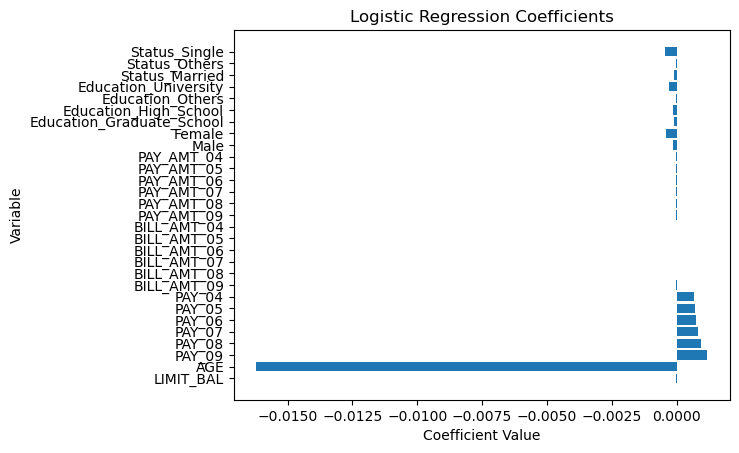

In [82]:
plt.barh(variable_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Variable')
plt.title('Logistic Regression Coefficients')
plt.show()

In [83]:
x_train_with_intercept = sm.add_constant(x_train)
logit_model = sm.Logit(y_train, x_train_with_intercept)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.465737
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             DEF_PAY_10   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23973
Method:                           MLE   Df Model:                           26
Date:                Tue, 23 Jan 2024   Pseudo R-squ.:                  0.1213
Time:                        20:33:22   Log-Likelihood:                -11178.
converged:                       True   LL-Null:                       -12720.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.7298   9.46e+05  -7.71e-07      1.000   -1.85e

In [ ]:
#identifying is the relationship between features and target variables are linear
sns.pairplot(data, x_vars=['PAY_1', 'PAY_2'], y_vars='def_pay', kind='scatter')
plt.show()

In [ ]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

In [ ]:
#create the target variables
y = data['def_pay'].copy()
y

In [ ]:
#create the features
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X = data[features].copy()
X.columns

In [ ]:
#split into train and test (train 80% of the dataset and test the remaining 20%)
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size =0.20, random_state= 42)

In [ ]:
data.def_pay.describe()

In [ ]:
y_train.describe()

In [ ]:
y_test.describe()

In [ ]:
#create the classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=14) 
# training the classifier
classifier.fit(X_train, y_train)
# do our predictions on the test
predictions = classifier.predict(X_test)
# see how good we did on the test
accuracy_score(y_true = y_test, y_pred = predictions)

In [ ]:
classifier = DecisionTreeClassifier(max_depth=100, random_state=14) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# define the parameters grid
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

In [ ]:
# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, 
                         scoring= 'accuracy')

In [ ]:
#training
grid_tree.fit(X_train, y_train)

In [ ]:
print(grid_tree.best_estimator_)

In [ ]:
print(np.abs(grid_tree.best_score_))

In [ ]:
classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

In [ ]:
from sklearn.model_selection import KFold


In [ ]:
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

# for i,(train_index, test_index) in enumerate(kf.split(df)):
#     training = df.iloc[train_index,:]
#     valid = df.iloc[test_index,:]
#     feats = training[features] #defined above
#     label = training['def_pay']
#     valid_feats = valid[features]
#     valid_label = valid['def_pay']
#     classifier.fit(feats,label) #it is the last one we run, the best one
#     pred = classifier.predict(valid_feats)
#     score = accuracy_score(y_true = valid_label, y_pred = pred)
#     fold.append(i+1)
#     scr.append(score)

kf.split(data)